<a href="https://colab.research.google.com/github/TamamoNoMae13/tieuluan-nhapmon-attt/blob/main/Ti%E1%BB%83u_lu%E1%BA%ADn_ATTT_nh%C3%B3m_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tiểu luận nhóm 2

**TRƯỜNG ĐẠI HỌC CÔNG NGHỆ - ĐẠI HỌC QUỐC GIA HÀ NỘI**

![logo UET](https://media.discordapp.net/attachments/516565469713399808/912210571414372382/uet-transparency.png?width=283&height=285)

## Đề tài: Lập trình hệ mật DES và 3DES

**Môn:** Nhập môn An toàn thông tin

**Lớp học phần:** INT3213 1

**Giảng viên:** Lê Phê Đô

# Thành viên nhóm

| Mã sinh viên | Họ và tên |
| :-: | :- |
| 18020583 | Nguyễn Mạnh Hùng |
| 18020675 | Trần Trọng Nguyễn Khang |
| 18021412 | Vũ Tố Uyên |

# Cam kết

Mọi nội dung trong báo cáo dưới đây đều được tự viết bởi thành viên nhóm em, không qua sao chép trực tiếp từ bất cứ nguồn nào.

Những đoạn tham khảo đều có trích đường dẫn tới trang nguồn đầy đủ.

Nếu có phát hiện sao chép, bọn em xin chịu hoàn toàn trách nhiệm

<!---
  guide: https://www.w3schools.io/file/markdown-cheatsheet/
  chuẩn hoá:
    - 2 space + enter = xuống dòng
    - 2 enter = div/paragraph mới
--->

# Data Encryption Standard

*Chi tiết: [Data Encryption Standard](https://en.wikipedia.org/wiki/Triple_DES)*

## Giải thích thuật toán

Đây là thuật toán mã hoá 1 đoạn tin 64-bit, sử dụng 1 khoá 64-bit.

Độ phức tạp khi bị tấn công là $2^{56}$, do thực tế đoạn khoá 64-bit sẽ được biến đổi còn 56-bit, và khoá 56-bit này mới được đem vào sử dụng khi mã hoá.

Thuật toán biến đổi trật tự đoạn bit gốc, tiếp đến là mã hoá với Feistel cipher 16 lần liên tiếp, với mỗi lần sử dụng 1 khoá khác nhau (được tính toán từ khoá 56-bit nhắc đến ở trên), sau đó được biến đổi lại trật tự và cho ra đoạn mã 64-bit.

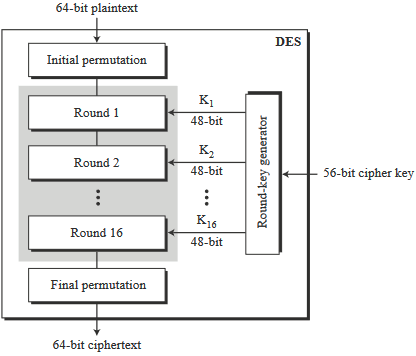

### Xử lý khoá:

Đoạn khoá 64-bit sẽ được biến đổi trật tự theo bảng **Parity-bit Drop** còn 56-bit:

| | | | | | | |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 57 | 49 | 41 | 33 | 25 | 17 | 9 |
| 1 | 58 | 50 | 42 | 34 | 26 | 18 |
| 10 | 2 | 59 | 51 | 43 | 35 | 27 |
| 19 | 11 | 3 | 60 | 52 | 44 | 36 |

| | | | | | | |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 63 | 55 | 47 | 39 | 31 | 23 | 15 |
| 7 | 62 | 54 | 46 | 38 | 30 | 22 |
| 14 | 6 | 61 | 53 | 45 | 37 | 29 |
| 21 | 13 | 5 | 28 | 20 | 12 | 4 |

Chúng sẽ được tách thành làm đôi, 2 nửa $C$ và $D$ mỗi phần 28-bit.

Tiếp đến, ta sẽ cùng dịch trái 1 hoặc 2 bit $C$ và $D$, tuỳ vào việc vào thời điểm đó là vòng Feistel cipher thứ mấy.

| Vòng | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| Số bit dịch trái | 1 | 1 | 2 | 2 | 2 | 2 | 2 | 2 | 1 | 2 | 2 | 2 | 2 | 2 | 2 | 1 |

Sau khi dịch bit xong thì gộp $C$ và $D$ lại (56-bit), tiếp tục biến đổi trật tự theo bảng **Key-compression D-box** về 48-bit:

| | | | | | | | |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 14 | 17 | 11 | 24 | 1 | 5 | 3 | 28 |
| 15 | 6 | 21 | 10 | 23 | 19 | 12 | 4 |
| 26 | 8 | 16 | 7 | 27 | 20 | 13 | 2 |
| 41 | 52 | 31 | 37 | 47 | 55 | 30 | 40 |
| 51 | 45 | 33 | 48 | 44 | 49 | 39 | 56 |
| 34 | 53 | 46 | 42 | 50 | 36 | 29 | 32 |

Xong bước trên, ta đã có $K_0$ một trong 16 khoá phụ để mã hoá DES.

Quay lại 2 nửa $C$ và $D$, ta tiếp tục dịch trái bit, gộp lại, biến đổi $PC2$. Lặp lại như vậy 15 lần nữa, ta sẽ có 16 khoá phụ $\left(K_0, K_1, ..., K_{15}\right)$ 48-bit riêng biệt để sử dụng vào 16 lần Feistel cipher.

### Mã hoá tin

Đầu tiên, ta biến đổi trật tự bit của đoạn tin theo bảng **Initial Permutation** dưới đây:

| | | | | | | | |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 58 | 50 | 42 | 34 | 26 | 18 | 10 | 2 |
| 60 | 52 | 44 | 36 | 28 | 20 | 12 | 4 |
| 62 | 54 | 46 | 38 | 30 | 22 | 14 | 6 |
| 64 | 56 | 48 | 40 | 32 | 24 | 16 | 8 |

| | | | | | | | |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 57 | 49 | 41 | 33 | 25 | 17 | 9 | 1 |
| 59 | 51 | 43 | 35 | 27 | 19 | 11 | 3 |
| 61 | 53 | 45 | 37 | 29 | 21 | 13 | 5 |
| 63 | 55 | 47 | 39 | 31 | 23 | 15 | 7 |

Ta bắt đầu thuật toán Feistel cipher từ đây. Với hàm $F$ là mã hoá DES.  
*Chi tiết: [Feistel cipher](https://en.wikipedia.org/wiki/Feistel_cipher)*

![diagram](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Feistel_cipher_diagram_en.svg/328px-Feistel_cipher_diagram_en.svg.png)

Việc đầu tiên, ta chia đoạn bit vừa được biến đổi làm 2 nửa, gọi là $L_0$ và $R_0$ (mỗi nửa 32-bit).

Sơ đồ hàm DES:  
![DES Function](https://imgur.com/pHzVwRl.png)

Các bước thực hiện hàm $F$:

1. Ta đem $R_i$ mở rộng lên 48-bit thông qua **Expansion Permutation**:
  ![exp_d](https://imgur.com/Xr2iT5I.png)
2. Với đoạn $R_i$ 48-bit hiện tại, ta cộng XOR với khoá phụ tương ứng cho ra một đoạn nhị phân 48-bit mới:  
$$\left(R_i \oplus K_i \right)$$
3. Tách đoạn 48-bit vừa tạo thành 8 block 6-bit, tra cứu 8 [S-box](https://en.wikipedia.org/wiki/S-box) để thu gọn mỗi block về 4-bit, rồi gộp lại thành đoạn 32-bit.  
  ![S-Box](https://imgur.com/kipSeFL.png)  
  **Cách tra cứu:** lấy 2 ký tự đầu và cuối của block 6-bit làm giá trị cột, 4 ký tự giữa làm giá trị hàng, tra cứu S-box tương ứng với block hiện tại (ví dụ: block thứ nhất sẽ tra $S_1$, block 8 sẽ tra $S_8$).  
  ![check s-box](https://imgur.com/piVBSO4.png)
4. Với đoạn nhị phân 32-bit thu được, ta biến đổi trật tự theo bảng **Straight Permutation**:

| | | | | | | | |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 16 | 7 | 20 | 21 | 29 | 12 | 28 | 17 |
| 1 | 15 | 23 | 26 | 5 | 18 | 31 | 10 |
| 2 | 8 | 24 | 14 | 32 | 27 | 3 | 9 |
| 19 | 13 | 30 | 6 | 22 | 11 | 4 | 25 |

5. Đoạn nhị phân 32-bit thu được ở trên $\left(R_{0}^{'}\right)$ sẽ được cộng XOR với nửa trái:  
$$ R_{i}^{'} \oplus L_i $$  
Kết quả trên sẽ được lấy làm nửa phải mới $R_{i+1}$, còn nửa phải cũ $R_{i}$ sẽ trở thành nửa trái mới $L_{i+1}$.

Thuật toán Feistel sẽ được chạy 16 lần, với mỗi lần DES có khoá khác nhau.  
Bước cuối, ta hoán đổi vị trí $L_{15}$ và $R_{15}$, có đoạn mã 64-bit mới.

Với đoạn mã trên, ta biến đổi với bảng Final Permutation (là bảng nghịch đảo của Initial Permutation):

| | | | | | | | |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 40 | 8 | 48 | 16 | 56 | 24 | 64 | 32 |
| 39 | 7 | 47 | 15 | 55 | 23 | 63 | 31 |
| 38 | 6 | 46 | 14 | 54 | 22 | 62 | 30 |
| 37 | 5 | 45 | 13 | 53 | 21 | 61 | 29 |
| 36 | 4 | 44 | 12 | 52 | 20 | 60 | 28 |
| 35 | 3 | 43 | 11 | 51 | 19 | 59 | 27 |
| 34 | 2 | 42 | 10 | 50 | 18 | 58 | 26 |
| 33 | 1 | 41 | 9 | 49 | 17 | 57 | 25 |

Đoạn mã 64-bit trên chính là đoạn mã được mã hoá từ bản tin gốc với thuật toán DES.

Về bản chất, thuật toán DES chỉ là hàm $F$ trong sơ đồ Feistel cipher. Tuy nhiên, quy trình mã hoá với DES bao gồm:
- Tạo 16 khoá phụ (từ khoá gốc).
- Biến đổi trật tự tin.
- Sử dụng thuật toán Feistel 16 lần, kết hợp với DES, mỗi lần một khoá phụ khác nhau.
- Biến đổi lại trật tự và cho ra bản mã.

### Cách giải mã

Thực hiện các bước y hệt như khi mã hoá. Tuy nhiên, thứ tự khoá phụ sử dụng sẽ ngược lại.

## Triple DES (TDES, 3DES)

*Nguồn: [Triple DES](https://en.wikipedia.org/wiki/Triple_DES)*

Được biết đến là hệ cải tiến của DES, bằng cách sử dụng quy trình DES 3 lần với 3 khoá riêng biệt.

Cách mã hoá 3DES:  
$$ \text{ciphertext} = E_{K3}\left(D_{K2}\left(E_{K1}\left(\text{plaintext}\right)\right)\right) $$

Cách gỉải mã 3DES:  
$$ \text{plaintext} = D_{K1}\left(E_{K2}\left(D_{K3}\left(\text{ciphertext}\right)\right)\right) $$

Với tính chất như trên, cặp $\left(K_1, K_2\right)$ và $\left(K_2, K_3\right)$ không được trùng nhau, do chúng sẽ triệt tiêu, và nó không khác gì DES (nhưng vẫn tốn hiệu năng gấp 3 lần).

Mặc dù sử dụng 3 khoá (tổng 192-bit), nhưng do DES lược bỏ 64-bit còn 56-bit, độ phức tạp khi bị tấn công vẫn không đạt $2^{3 \times 56} = 2^{168}$ mà chỉ là $2^{112}$, do bị ảnh hưởng bởi [tấn công Meet-in-the-middle](https://en.wikipedia.org/wiki/Meet-in-the-middle_attack).

# Tự thiết kế nhân DES (bằng `python3`):


## Một số ma trận biến đổi mẫu

Tất cả đều tính theo hệ đếm bắt đầu từ 1.

In [1]:
# Parity-bit Drop
PC1 = [57, 49, 41, 33, 25, 17, 9, 1,
       58, 50, 42, 34, 26, 18, 10, 2,
       59, 51, 43, 35, 27, 19, 11, 3,
       60, 52, 44, 36, 63, 55, 47, 39,
       31, 23, 15, 7, 62, 54, 46, 38,
       30, 22, 14, 6, 61, 53, 45, 37,
       29, 21, 13, 5, 28, 20, 12, 4]

# Number of bit(s) get left-shift (base on current round)
SHIFT_TABLE = [1, 1, 2, 2, 2, 2, 2, 2,
               1, 2, 2, 2, 2, 2, 2, 1]

# Key-compression D-box
PC2 = [14, 17, 11, 24, 1, 5, 3, 28,
       15, 6, 21, 10, 23, 19, 12, 4,
       26, 8, 16, 7, 27, 20, 13, 2,
       41, 52, 31, 37, 47, 55, 30, 40,
       51, 45, 33, 48, 44, 49, 39, 56,
       34, 53, 46, 42, 50, 36, 29, 32]

# Initial permutation
IP = [58, 50, 42, 34, 26, 18, 10, 2,
      60, 52, 44, 36, 28, 20, 12, 4,
      62, 54, 46, 38, 30, 22, 14, 6,
      64, 56, 48, 40, 32, 24, 16, 8,
      57, 49, 41, 33, 25, 17, 9, 1,
      59, 51, 43, 35, 27, 19, 11, 3,
      61, 53, 45, 37, 29, 21, 13, 5,
      63, 55, 47, 39, 31, 23, 15, 7]

# Expansion D-Box
EXP_D = [32, 1, 2, 3, 4, 5,
         4, 5, 6, 7, 8, 9,
         8, 9, 10, 11, 12, 13,
         12, 13, 14, 15, 16, 17,
         16, 17, 18, 19, 20, 21,
         20, 21, 22, 23, 24, 25,
         24, 25, 26, 27, 28, 29,
         28, 29, 30, 31, 32, 1]

# S-box
S_BOX = [[[14, 4, 13, 1, 2, 15, 11, 8, 3, 10, 6, 12, 5, 9, 0, 7],
          [0, 15, 7, 4, 14, 2, 13, 1, 10, 6, 12, 11, 9, 5, 3, 8],
          [4, 1, 14, 8, 13, 6, 2, 11, 15, 12, 9, 7, 3, 10, 5, 0],
          [15, 12, 8, 2, 4, 9, 1, 7, 5, 11, 3, 14, 10, 0, 6, 13]],

         [[15, 1, 8, 14, 6, 11, 3, 4, 9, 7, 2, 13, 12, 0, 5, 10],
          [3, 13, 4, 7, 15, 2, 8, 14, 12, 0, 1, 10, 6, 9, 11, 5],
          [0, 14, 7, 11, 10, 4, 13, 1, 5, 8, 12, 6, 9, 3, 2, 15],
          [13, 8, 10, 1, 3, 15, 4, 2, 11, 6, 7, 12, 0, 5, 14, 9]],

         [[10, 0, 9, 14, 6, 3, 15, 5, 1, 13, 12, 7, 11, 4, 2, 8],
          [13, 7, 0, 9, 3, 4, 6, 10, 2, 8, 5, 14, 12, 11, 15, 1],
          [13, 6, 4, 9, 8, 15, 3, 0, 11, 1, 2, 12, 5, 10, 14, 7],
          [1, 10, 13, 0, 6, 9, 8, 7, 4, 15, 14, 3, 11, 5, 2, 12]],

         [[7, 13, 14, 3, 0, 6, 9, 10, 1, 2, 8, 5, 11, 12, 4, 15],
          [13, 8, 11, 5, 6, 15, 0, 3, 4, 7, 2, 12, 1, 10, 14, 9],
          [10, 6, 9, 0, 12, 11, 7, 13, 15, 1, 3, 14, 5, 2, 8, 4],
          [3, 15, 0, 6, 10, 1, 13, 8, 9, 4, 5, 11, 12, 7, 2, 14]],

         [[2, 12, 4, 1, 7, 10, 11, 6, 8, 5, 3, 15, 13, 0, 14, 9],
          [14, 11, 2, 12, 4, 7, 13, 1, 5, 0, 15, 10, 3, 9, 8, 6],
          [4, 2, 1, 11, 10, 13, 7, 8, 15, 9, 12, 5, 6, 3, 0, 14],
          [11, 8, 12, 7, 1, 14, 2, 13, 6, 15, 0, 9, 10, 4, 5, 3]],

         [[12, 1, 10, 15, 9, 2, 6, 8, 0, 13, 3, 4, 14, 7, 5, 11],
          [10, 15, 4, 2, 7, 12, 9, 5, 6, 1, 13, 14, 0, 11, 3, 8],
          [9, 14, 15, 5, 2, 8, 12, 3, 7, 0, 4, 10, 1, 13, 11, 6],
          [4, 3, 2, 12, 9, 5, 15, 10, 11, 14, 1, 7, 6, 0, 8, 13]],

         [[4, 11, 2, 14, 15, 0, 8, 13, 3, 12, 9, 7, 5, 10, 6, 1],
          [13, 0, 11, 7, 4, 9, 1, 10, 14, 3, 5, 12, 2, 15, 8, 6],
          [1, 4, 11, 13, 12, 3, 7, 14, 10, 15, 6, 8, 0, 5, 9, 2],
          [6, 11, 13, 8, 1, 4, 10, 7, 9, 5, 0, 15, 14, 2, 3, 12]],

         [[13, 2, 8, 4, 6, 15, 11, 1, 10, 9, 3, 14, 5, 0, 12, 7],
          [1, 15, 13, 8, 10, 3, 7, 4, 12, 5, 6, 11, 0, 14, 9, 2],
          [7, 11, 4, 1, 9, 12, 14, 2, 0, 6, 10, 13, 15, 3, 5, 8],
          [2, 1, 14, 7, 4, 10, 8, 13, 15, 12, 9, 0, 3, 5, 6, 11]]]

# Straight Permutation
D_BOX = [16, 7, 20, 21, 29, 12, 28, 17,
         1, 15, 23, 26, 5, 18, 31, 10,
         2, 8, 24, 14, 32, 27, 3, 9,
         19, 13, 30, 6, 22, 11, 4, 25]

# Final Permutation
IP1 = [40, 8, 48, 16, 56, 24, 64, 32,
       39, 7, 47, 15, 55, 23, 63, 31,
       38, 6, 46, 14, 54, 22, 62, 30,
       37, 5, 45, 13, 53, 21, 61, 29,
       36, 4, 44, 12, 52, 20, 60, 28,
       35, 3, 43, 11, 51, 19, 59, 27,
       34, 2, 42, 10, 50, 18, 58, 26,
       33, 1, 41, 9, 49, 17, 57, 25]

## Các hàm hỗ trợ việc mã hoá

### Hàm biến đổi trật tự theo ma trận

In [2]:
def permute(input, matrix):
  output = ""
  for x in matrix:
    output += input[x-1]
  return output

In [3]:
# Vì mục đích minh hoạ biến đổi dễ thấy hơn, ví dụ sẽ không dùng hệ nhị phân
print(
  permute("1234567890123456789012345678901234567890123456789012345678901234", \
          PC1))  # 64 to 56
# 56 to 48
print(permute("12345678901234567890123456789012345678901234567890123456", PC2))
print(
  permute("1234567890123456789012345678901234567890123456789012345678901234", \
          IP))  # 64 to 64
print(permute("12345678901234567890123456789012", EXP_D))  # 32 to 48
print(permute("12345678901234567890123456789012", D_BOX))  # 32 to 32
print(
  permute("1234567890123456789012345678901234567890123456789012345678901234", \
          IP1))  # 64 to 64

79135791802468029135791302463579135724680246135791358024
471415385610392468677032121775001538499643620692
8024680202468024246802464680246879135791913579131357913535791357
212345456789890123234567678901012345456789890121
67019287153658102844273993062145
0886644297755331866442207553311964422008533119974220088631199775


### Hàm dịch trái bit và hàm tạo 16 sub-keys 48-bit từ key 64-bit

In [4]:
def left_shift(s, k):  # shift left k times
  return s[k:len(s)] + s[0:k]

def gen_subkeys(key):
  # 64-bit key ----PC1----> 56-bit ----> 2 halves (28-bit each)
  k_c = permute(key, PC1[0:28])
  k_d = permute(key, PC1[28:56])
  # Generate subkeys
  sub_keys = []
  for i in range(16):
    # Left shift i-bit, base on current round
    k_c = left_shift(k_c, SHIFT_TABLE[i])
    k_d = left_shift(k_d, SHIFT_TABLE[i])
    # Join 2 halves ----PC2----> 48-bit, add to List
    sub_keys.append(permute(k_c + k_d, PC2))
  return sub_keys

In [5]:
# Vì mục đích minh hoạ biến đổi dễ thấy hơn, ví dụ sẽ không dùng hệ nhị phân
test_str0 = left_shift("1234567890123456789012345678", 1)
print(test_str0, left_shift(test_str0, 2), sep='\n')
gen_subkeys("1234567890123456789012345678901234567890123456789012345678901234")

2345678901234567890123456781
4567890123456789012345678123


['014097372992356548916781289474705339118350543251',
 '236219599114078760187903401693928551330572765473',
 '170658933008412194521397145037362925784943130817',
 '519992877442701038965231552481733360121387574254',
 '903386211871145472309670996125477804535721015628',
 '347720600215579811298914330532811245079465459362',
 '271169044159913205632308874976255319413832503706',
 '610003987593852149976742241310602753558276947143',
 '732225109710074361198969463532124975770498132365',
 '176619593104417700532893507076538312144132576839',
 '519053937047801194921237941443972756585586210273',
 '903992371481245037865671315587316400229923654318',
 '847336210725189471299010750921853844663337021752',
 '281729604119528715633904494365227251037871465103',
 '620163948558912109072347835730361695474215109547',
 '892375160770134321294569057252583117696438321739']

### Hàm thu gọn 48-bit còn 32-bit thông qua S-box

In [6]:
def dec_to_bin(dec_num):  # decimal to 4-bit binary
  output = ""
  for i in reversed(range(4)):
    output = str(dec_num % 2) + output
    dec_num //= 2
  return output

def s_boxes(input):
  output = ""
  for i in range(8):  # Go through 8 S-boxes
    row = 2*int(input[(6*i)]) + int(input[(6*i+5)])  # 1st and 6th bit
    # 2nd-5th bit
    column = 8*int(input[(6*i+1)]) + 4*int(input[(6*i+2)]) + \
              2*int(input[(6*i+3)]) + int(input[(6*i+4)])
    # Check value in S-box[i] & put 4-bit result from S-box to arrS
    output += dec_to_bin(S_BOX[i][row][column])
  return output

In [7]:
# Test
print(dec_to_bin(8))
print(s_boxes("111010010101111100100110010000100101010010101101"))

1000
10100001111000001000001011001000


### Hàm tính XOR 2 xâu nhị phân

In [8]:
def calc_xor(bin_str1, bin_str2):
  output = ""
  for i in range(len(bin_str1)):
    output += str(int(bin_str1[i]) ^ int(bin_str2[i]))
  return output

In [9]:
# Test
test_str0 = "0011"
test_str1 = "0101"
print("   a    =", test_str0)
print("   b    =", test_str1)
print("a XOR b =", calc_xor(test_str0, test_str1))

   a    = 0011
   b    = 0101
a XOR b = 0110


## Hàm mã hóa và giải mã DES (tin và khoá đều ở dạng 64-bit nhị phân)

In [10]:
def des_core(x, k, crypt):
  # Encrypt: Use sub-keys in original order
  # Decrypt: Reverse the order of sub-keys
  ord = range(16)
  if crypt == 'd':
    ord = reversed(range(16))
  # Get keys for 16 rounds of DES
  sub_keys = gen_subkeys(k)
  # Text ----IP----> 64-bit ----> 2 halves (32-bit each)
  left_half = permute(x, IP[0:32])
  right_half = permute(x, IP[32:64])
  # Starting 16 rounds of Feistel cipher
  for r in ord:
    # Right-half (32-bit) ---expand---> 48-bit ---XOR with subkey---> 48-bit
    # ---S_BOX---> 32-bit ---D_BOX---> 32-bit ---XOR with left-half--->
    # New right-half (32-bit)
    new_r_half = \
                calc_xor(
                        left_half, \
                        permute(
                                s_boxes(
                                      calc_xor(
                                                permute(right_half, EXP_D), \
                                                sub_keys[r])), \
                                D_BOX))
    left_half = right_half  # New left-half <-- old right-half
    right_half = new_r_half  # Assign new right-half
  # Join 2 halves and permute with inverse IP
  return permute(right_half + left_half, IP1)

In [11]:
# Test
x = "0001110010111100001011000000011011000100001110011101101011111010"
k = "1011111010100001101111000011101101110000111000010110010001011110"
y = des_core(x, k, 'e')
d_y = des_core(y, k, 'd')
print(y, d_y, x == d_y, sep='\n')

1100010111000000010010010100101010110000010011000101000111001101
0001110010111100001011000000011011000100001110011101101011111010
True


# Thiết kế 3DES (tin và khoá đều ở dạng 64-bit nhị phân):

In [12]:
def tdes_core(msg, k1, k2, k3, crypt):
  if crypt == 'e':
    return des_core(des_core(des_core(msg, k1, "e"), k2, "d"), k3, "e")
  return des_core(des_core(des_core(msg, k3, "d"), k2, "e"), k1, "d")

In [13]:
# Test
x = "0011001100001110000110111100110000000001100100110010001010100110"
k1 = "0111000000011000111011101010110101001100101111010011100100100011"
k2 = "1110111110000110111111010000100110110110111111010001100110010010"
k3 = "0001101010011111110110101000101011100011010100101100111101000101"
y = tdes_core(x, k1, k2, k3, 'e')
d_y = tdes_core(y, k1, k2, k3, 'd')
print(y, d_y, x == d_y, sep= '\n')

0110010000001101101100110100001001100001101110110001011000000001
0011001100001110000110111100110000000001100100110010001010100110
True


# Áp dụng mã hoá tin với DES, 3DES và giải mã

## Các hàm hỗ trợ

### Hàm chèn `0` vào cuối xâu

Giúp đệm đoạn tin cần mã hoá đủ bit = bội của 64.

In [14]:
def add_trailing_zero(s):
  if len(s) % 64 != 0:
    return s + '0' * (64 - len(s) % 64)
  return s

In [15]:
# Test
# length = 60
test_str0 = "012345678901234567890123456789012345678901234567890123456789"
test_str1 = add_trailing_zero(test_str0)
print(test_str1, "Length: " + str(len(test_str1)), sep='\n')

0123456789012345678901234567890123456789012345678901234567890000
Length: 64


### Hàm tách xâu dài thành mảng chứa các block 64 ký tự

In [16]:
def split_block(bin_str):  # input is a multiple-of-64 bit string
  output = []
  for i in range(len(bin_str) // 64):
    output.append(bin_str[64*i:64*i+64])
  return output

In [17]:
# Test
split_block(test_str1 + test_str1 + test_str1)  # 192 chars

['0123456789012345678901234567890123456789012345678901234567890000',
 '0123456789012345678901234567890123456789012345678901234567890000',
 '0123456789012345678901234567890123456789012345678901234567890000']

### Hàm kiểm tra input

In [54]:
CRYPT_MODE = ['e', 'd']
SUPPORTED_MODE = ["ecb", "cbc", "cfb", "ofb", "ctr"]
BIN_CHAR = ['0', '1']

def check_before_crypt(crypt, mode, x, k_arr, iv):
  if crypt not in CRYPT_MODE:
    return "Please specify if you want to \'e\'ncrypt or \'d\'ecrypt!"
  if mode not in SUPPORTED_MODE:
    return "Only \"ecb\", \"cbc\", \"cfb\", \"ofb\" modes are supported!"
  bin_str_arr = [x]
  if mode != "ecb":
    if iv == None: return "This mode requires an IV."
    else: 
      bin_str_arr += k_arr
      bin_str_arr.append(iv)
  else: bin_str_arr += k_arr
  for i in range(len(bin_str_arr)):
    for c in bin_str_arr[i]:
      if c not in BIN_CHAR:
        return "Text, Key, or IV is not binary."
    # Ignore 1st element (text) when checking 64-bit requirement
    if i != 0 and len(bin_str_arr[i]) != 64:
      return "Your Key or IV is not 64-bit!"
  return True

In [21]:
# Test
test_str0 = 'e'  # Valid crypt
# Valid text
test_str1 = "1000001110111010011110101111011100111001010001100110010010111001"
# Valid key
test_str2 = "1100101100011010100011101100010101110101000010001110110001010011"
# Valid IV  
test_str3 = "1010110010000101100001100111111001100100010000110011100011110101"

print(check_before_crypt('c', 'm', 'x', ['k', 'k', 'k'], None))
print(check_before_crypt(test_str0, 'm', 'x', ['k', 'k', 'k'], None))
print(check_before_crypt(test_str0, 'cbc', 'x', ['k', 'k', 'k'], None))
print(check_before_crypt(test_str0, 'cbc', 'x', ['k', 'k', 'k'], 'iv'))
print(check_before_crypt(test_str0, 'cbc', '10', ['01', '11', '00'], '0'))
print(
    check_before_crypt(test_str0, \
                       'cbc', test_str1, \
                       [test_str2, test_str2, test_str2], test_str3))
print(
    check_before_crypt(test_str0, \
                       'ecb', test_str1, \
                       [test_str2, test_str2, test_str2], None))

Please specify if you want to 'e'ncrypt or 'd'ecrypt!
Only "ecb", "cbc", "cfb", "ofb" modes are supported!
This mode requires an IV.
Text, Key, or IV is not binary.
Your Key or IV is not 64-bit!
True
True


## Nâng cao: Áp dụng các cơ chế tách block để mã hoá đoạn tin dài

*Chi tiết: [Block cipher mode of operations](https://en.wikipedia.org/wiki/Block_cipher_mode_of_operation)*

### Phương pháp cơ bản nhất

#### Electronic Codebook (ECB)

Đoạn tin dài được chia thành các block 64-bit $\left(x_1, x_2, ..., x_n\right)$.

Sau đó mỗi block được mã hoá và cho ra bản mã tương ứng:

$$ y_i = E(x_i) $$

Sơ đồ mã hoá:  
![ECB_e](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d6/ECB_encryption.svg/640px-ECB_encryption.svg.png)


Khi giải mã, ta cũng chỉ cần tách bản mã thành các block 64-bit và giải mã lần lượt:

$$ x_i = D(y_i) $$

Sơ đồ giải mã:  
![ECB_d](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e6/ECB_decryption.svg/640px-ECB_decryption.svg.png)

### Các phương pháp tốt hơn

Với những phương pháp dưới đây, sẽ không xảy ra việc đoạn tin có dấu hiệu lặp lại thì đoạn mã cũng sẽ có tính chất tương tự. Do việc mã hoá có tính chất liên tục, áp dụng kết quả bước nào đó block cũ để dồn vào block mới mã hoá tiếp, thay vì độc lập riêng mỗi block.

Chúng bao gồm:  
- Cipher block chaining (CBC)
- Cipher Feedback (CFB)
- Output Feedback (OFB)
- Counter (CTR)

#### Cipher block chaining (CBC)

Đoạn tin dài được chia thành các block 64-bit $\left(x_1, x_2, ..., x_n\right)$.

Trước khi bắt đầu mã hoá $\left(x_1\right)$, một Initialisation Vector (IV) 64-bit $\left(y_0\right)$ sẽ được đưa vào để cộng XOR với block tin này:

$$ y_1 = E\left(x_1 \oplus y_0\right) $$

Áp dụng kiểu xích dây chuyền (chaining), ta có công thức mã hoá:

$$ y_i = E\left(x_i \oplus y_{y-1}\right) $$

Sơ đồ mã hoá:  
![CBC Encrypt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/CBC_encryption.svg/640px-CBC_encryption.svg.png)

Khi giải mã cũng sẽ phức tạp hơn so với ECB:

$$ x_i = y_{i-1} \oplus D\left(y_i\right) $$

Sơ đồ giải mã:  
![CBC Decrypt](https://upload.wikimedia.org/wikipedia/commons/thumb/2/2a/CBC_decryption.svg/640px-CBC_decryption.svg.png)

#### Cipher Feedback (CFB)

Cũng sử dụng IV như CBC, nhưng thay vì cộng XOR vào đoạn tin trước khi mã hoá, ta mã hoá IV và cộng XOR với đoạn tin.  
Đoạn mã của block x sẽ được sử dụng như IV ở block x+1.  
Ngoài ra, ở cả lần mã hoá và giải mã, ta sẽ đều sử dụng thuật toán ***mã hoá*** DES.

Dưới đây là minh hoạ về Full-block CFB.

**Mã hoá:**

$$ y_i = 
\begin{cases}
\text{IV} & \text{if } i = 0 \\
E\left(y_{i-1}\right) \oplus x_i & \text{otherwise}
\end{cases} $$

Sơ đồ mã hoá:  
![CFB_e](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9d/CFB_encryption.svg/640px-CFB_encryption.svg.png)

**Giải mã:**

$$ x_i = E\left(y_{i-1}\right) \oplus y_i $$

Sơ đồ giải mã:  
![CFB_d](https://upload.wikimedia.org/wikipedia/commons/thumb/5/57/CFB_decryption.svg/640px-CFB_decryption.svg.png)

Ngoài ra, CFB còn có các biến thể CFB-***x***, ví dụ: CFB-1, CFB-4, CFB-8, CFB-16, CFB-32, ...

Đó là khi ta cộng XOR ***block tin*** và ***IV bị mã hoá***:
- Ta lấy x-bit đầu của kết quả đó (gọi tạm là $\alpha$).
- Ta dịch trái bit IV đi x bước, sau đó thay $\alpha$ vào x bit cuối của IV.
- Lấy kết quả thu được làm nguyên liệu mã hoá cho block kế.

Vậy là chỉ có 1 phần kết quả cộng XOR được dùng sử dụng dây chuyền, thay vì toàn bộ Ciphertext của block đó.

Trong mục code ở bên dưới thuộc báo cáo này, bọn em chỉ làm Full-block CFB.

#### Output Feedback (OFB)

Tương tự CFB, nhưng thay vì lấy kết quả $\left(\text{mã hoá IV} \oplus x_1 \right) = y_1$ làm nguyên liệu mã hoá ở block 2, ta sẽ sử dụng luôn kết quả $\text{mã hoá IV}$.  
Ngoài ra, giống như CFB, ở cả lần mã hoá và giải mã, ta sẽ đều sử dụng thuật toán ***mã hoá*** DES.

$$ y_j = x_j \oplus O_j, \\
x_j = y_j \oplus O_j, \\
O_j = E\left(I_j\right), \\
I_j = O_{j-1}, \\
I_0 = \text{IV}. $$

Sơ đồ mã hoá:  
![OFB_e](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/OFB_encryption.svg/640px-OFB_encryption.svg.png)

Sơ đồ giải mã:  
![OFB_d](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/OFB_decryption.svg/640px-OFB_decryption.svg.png)

#### Counter

Ta chia thành các block riêng biệt không móc nối giống ECB.  
Thay vì dùng IV, ta sử dụng 1 **nonce**, và cho nó tịnh tiến (+1, +2, ...), hoặc dịch bit, hoặc bất cứ hình thức biến đổi "đều" với mỗi block. Bởi vì nó có tính chất biến đổi tăng/giảm dần nên ta gọi nó là bộ đếm (counter).  
Ta mã hoá các nonce ở mỗi block, sau đó cộng XOR với đoạn tin ở block tương ứng, ra được đoạn mã thuộc block đó.

**Minh hoạ:**

Mã hoá:  
![CTR_e](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/CTR_encryption_2.svg/640px-CTR_encryption_2.svg.png)

Giải mã:  
![CTR_d](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3c/CTR_decryption_2.svg/640px-CTR_decryption_2.svg.png)

Trong mục code ở bên dưới thuộc báo cáo này, bọn em sẽ dịch trái 1-bit nonce ở mỗi block.

## Áp dụng thực tiễn

Việc con người làm việc trực tiếp với mã nhị phân gần như không bao giờ xảy ra, đoạn văn bản hay khoá được đưa vào hầu như sẽ đều ở dạng *có thể đọc và hiểu được*. Quy chuẩn hiện nay để mã hoá các đoạn văn bản đó hay được sử dụng là UTF-8.

Để mã hoá với DES, ta cần chuyển được tin (hoặc mã) và khoá về nhị phân, mã hoá (hoặc giải mã) nó, xong chuyển về dạng bảng mã người dùng muốn.

Bọn em đã hỗ trợ được luồng đầu vào ở 2 bảng mã:
- UTF-8,
- Hexadecimal.

### Hàm chuyển bảng mã

**Hỗ trợ chuyển qua lại:**

- UTF-8
- Hệ thập lục phân (Hexadecimal, Hex)
- Hệ nhị phân (Binary, Bin)

In [24]:
import math

HEX_CHAR = ['0', '1', '2', '3', '4', '5', '6', '7',
            '8', '9', 'a', 'b', 'c', 'd', 'e', 'f']
SUPPORTED_ENC = ["bin", "hex", "utf8"]

def convert_text(text, i_enc, o_enc):
  i_enc = i_enc.lower()
  o_enc = o_enc.lower()
  if (i_enc not in SUPPORTED_ENC) or (o_enc not in SUPPORTED_ENC):
    return "Only \"bin\", \"hex\" and \"utf8\" are supported!"
  if i_enc == o_enc:
    return "Input and output encoders should not be the same!"
  if i_enc == "bin":
    for c in text:
      if c not in BIN_CHAR:
        return "Input is not binary!"
    if o_enc == "hex":
      return b2h(text)
    return b2t(text)
  if i_enc == "hex":
    for c in text:
      if c not in HEX_CHAR:
        return "Input is not hexadecimal!"
    if o_enc == "bin":
      return h2b(text)
    return h2t(text)
  if o_enc == "bin":
    return t2b(text)
  return t2h(text)

def h2b(s):
  return ''.join(["{0:04b}".format(int(char,16)) for char in s])

def b2h(s):
  output = ""
  # Handle 0s at the beginning
  for i in range(len(s) // 4 - 1):
    if s[4*i:4*i+4] != "0000": break
    else: output += '0'
  output += hex(int(s, 2))[2:]
  return output

def t2b(s):
  return ''.join(bin(char)[2:].zfill(8) for char in s.encode('utf-8'))

def b2t(s):
  return int(s, 2).to_bytes(math.ceil(len(s) / 8), 'big').decode('utf-8')

def t2h(s):
  return b2h(t2b(s))

def h2t(s):
  return b2t(h2b(s))

In [51]:
# Test error cases
print(convert_text('t','t','t'))
print(convert_text('t','utf8','utf8'))
print(convert_text('t','bin','utf8'))
print(convert_text('t','hex','utf8'))

Only "bin", "hex" and "utf8" are supported!
Input and output encoders should not be the same!
Input is not binary!
Input is not hexadecimal!


In [25]:
# Test
test_str0 = "情報保護"
hex_str0 = convert_text(test_str0, "utf8", "hex")  # to hex
bin_str0 = convert_text(test_str0, "utf8", "bin")  # to bin

test_str1 = convert_text(hex_str0, "hex", "utf8")  # to utf8
test_str2 = convert_text(bin_str0, "bin", "utf8")  # to utf8

hex_str1 = convert_text(bin_str0, "bin", "hex")  # to hex
bin_str1 = convert_text(hex_str0, "hex", "bin")  # to bin

print("Text: " + test_str0, "Hex: " + hex_str0, \
      "Bin:\n" + bin_str0, sep='\n')
print("Is all text strings same:", \
      test_str0 == test_str1 and test_str0 == test_str2)
print("Is 2 hex strings same:", hex_str0 == hex_str1)
print("Is 2 bin strings same:", bin_str0 == bin_str1)

Text: 情報保護
Hex: e68385e5a0b1e4bf9de8adb7
Bin:
111001101000001110000101111001011010000010110001111001001011111110011101111010001010110110110111
Is all text strings same: True
Is 2 hex strings same: True
Is 2 bin strings same: True


## Code

In [80]:
def long_text_des(x, mode, k, iv, crypt):
  chk = check_before_crypt(crypt, mode, x, [k], iv)
  if chk != True:
    return chk
  # Add 0-trail and split to multiple 64-bit blocks
  text_blocks = split_block(add_trailing_zero(x))
  vec = iv
  output = ""
  # Enc/Dec with DES
  if mode == "ecb":
    for i in range(len(text_blocks)):
      output += des_core(text_blocks[i], k, crypt)
  elif mode == "cbc":
    if crypt == 'e':
      for i in range(len(text_blocks)):
        vec = des_core(calc_xor(vec, text_blocks[i]), k, crypt)
        output += vec
    else:
      for i in range(len(text_blocks)):
        output += calc_xor(vec, des_core(text_blocks[i], k, crypt))
        vec = text_blocks[i]
  elif mode == "cfb":
    if crypt == 'e':
      for i in range(len(text_blocks)):
        vec = calc_xor(text_blocks[i], des_core(vec, k, crypt))
        output += vec
    else:
      for i in range(len(text_blocks)):
        output += calc_xor(des_core(vec, k, 'e'), text_blocks[i])
        vec = text_blocks[i]
  elif mode == "ofb":
    for i in range(len(text_blocks)):
      vec = des_core(vec, k, 'e')
      output += calc_xor(text_blocks[i], vec)
  else:
    for i in range(len(text_blocks)):
      output += calc_xor(des_core(vec, k, 'e'), text_blocks[i])
      vec = left_shift(vec, 1)

  return output

def long_text_tdes(x, mode, k1, k2, k3, iv, crypt):
  chk = check_before_crypt(crypt, mode, x, [k1, k2, k3], iv)
  if chk != True:
    return chk
  # Add 0-trail and split to multiple 64-bit blocks
  text_blocks = split_block(add_trailing_zero(x))
  vec = iv
  output = ""
  # Enc/Dec with TDES
  if mode == "ecb":
    for i in range(len(text_blocks)):
      output += tdes_core(text_blocks[i], k1, k2, k3, crypt)
  elif mode == "cbc":
    if crypt == 'e':
      for i in range(len(text_blocks)):
        vec = tdes_core(calc_xor(vec, text_blocks[i]), k1, k2, k3, crypt)
        output += vec
    else:
      for i in range(len(text_blocks)):
        output += calc_xor(vec, tdes_core(text_blocks[i], k1, k2, k3, crypt))
        vec = text_blocks[i]
  elif mode == "cfb":
    if crypt == 'e':
      for i in range(len(text_blocks)):
        vec = calc_xor(text_blocks[i], tdes_core(vec, k1, k2, k3, crypt))
        output += vec
    else:
      for i in range(len(text_blocks)):
        output += calc_xor(tdes_core(vec, k1, k2, k3, 'e'), text_blocks[i])
        vec = text_blocks[i]
  elif mode == "ofb":
    for i in range(len(text_blocks)):
      vec = tdes_core(vec, k1, k2, k3, 'e')
      output += calc_xor(text_blocks[i], vec)
  else:
    for i in range(len(text_blocks)):
      output += calc_xor(tdes_core(vec, k1, k2, k3, 'e'), text_blocks[i])
      vec = left_shift(vec, 1)
  return output

# Demo

## DES

In [83]:
# Test 1
x = "8cffc8b2ef4ee5023dddd4a3"
x_b = convert_text(x, "hex", "bin")
k = convert_text("3ee6be37cc6646e7", "hex", "bin")
iv = convert_text("e4520a2119f51114", "hex", "bin")  # work as nonce in CTR
print("  Plaintext:  " + x)
for mode in SUPPORTED_MODE:
  print(mode + " mode:")
  y_b = long_text_des(x_b, mode, k, iv, 'e')  # ECB mode ignores IV
  y = convert_text(y_b, "bin", "hex")
  d_y_b = long_text_des(y_b, mode, k, iv, 'd')
  d_y = convert_text(d_y_b, "bin", "hex")
  print("  Ciphertext: " + y, \
        "  Decrypt C:  " + d_y, sep='\n')

  Plaintext:  8cffc8b2ef4ee5023dddd4a3
ecb mode:
  Ciphertext: 50f93cf1ba4ff080d53c1d9dbb8a2a6f
  Decrypt C:  8cffc8b2ef4ee5023dddd4a300000000
cbc mode:
  Ciphertext: 770fb2037c88cb3722ee4f35f3ff3253
  Decrypt C:  8cffc8b2ef4ee5023dddd4a300000000
cfb mode:
  Ciphertext: 284c87fe31626a88a4f6c97c132cef3c
  Decrypt C:  8cffc8b2ef4ee5023dddd4a300000000
ofb mode:
  Ciphertext: 284c87fe31626a889fe77d92d1a83761
  Decrypt C:  8cffc8b2ef4ee5023dddd4a300000000
ctr mode:
  Ciphertext: 284c87fe31626a8839f68b072ac62203
  Decrypt C:  8cffc8b2ef4ee5023dddd4a300000000


In [82]:
# Test 2
x = "Chúng em chào thầy ạ!"
x_b = convert_text(x, "utf8", "bin")
k = convert_text("AnToanTT", "utf8", "bin")
iv = convert_text("INT32131", "utf8", "bin")  # work as nonce in CTR
print("  Plaintext:  " + x)
for mode in SUPPORTED_MODE:
  print(mode + " mode:")
  y_b = long_text_des(x_b, mode, k, iv, 'e')  # ECB mode ignores IV
  y = convert_text(y_b, "bin", "hex")
  d_y_b = long_text_des(y_b, mode, k, iv, 'd')
  d_y = convert_text(d_y_b, "bin", "utf8")
  print("  Ciphertext: " + y, \
        "  Decrypt C:  " + d_y, sep='\n')

  Plaintext:  Chúng em chào thầy ạ!
ecb mode:
  Ciphertext: 3064c8557ef87d43cffedcb04de3f6ebed4bab04a7adf65afc4d15bdb7552147
  Decrypt C:  Chúng em chào thầy ạ!     
cbc mode:
  Ciphertext: 6668cb029fa4c73b3af4b5700c5eb938c558852b9a255fa76b045af0464f3218
  Decrypt C:  Chúng em chào thầy ạ!     
cfb mode:
  Ciphertext: b75662c627c446cd9efb8c201b727beae0d4288210cb1d7b27aa316a9ed73c22
  Decrypt C:  Chúng em chào thầy ạ!     
ofb mode:
  Ciphertext: b75662c627c446cd8596b726697826b5690290abc565387feeba33da1a674f3f
  Decrypt C:  Chúng em chào thầy ạ!     
ctr mode:
  Ciphertext: b75662c627c446cd2a424b07b71a832423e817b614fdfaacff8224c6b76001d3
  Decrypt C:  Chúng em chào thầy ạ!     


## 3DES

In [84]:
# Test 1
x = "0caa08cea44b26a09ca2a26858ee38c2"
x_b = convert_text(x, "hex", "bin")
k1 = convert_text("5ceea80e4b0b3130", "hex", "bin")
k2 = convert_text("c59d20ace68163f3", "hex", "bin")
k3 = convert_text("b0b31c48f089bf23", "hex", "bin")
iv = convert_text("2276e866286e86e7", "hex", "bin")  # work as nonce in CTR
print("  Plaintext:  " + x)
for mode in SUPPORTED_MODE:
  print(mode + " mode:")
  y_b = long_text_tdes(x_b, mode, k1, k2, k3, iv, 'e')  # ECB mode ignores IV
  y = convert_text(y_b, "bin", "hex")
  d_y_b = long_text_tdes(y_b, mode, k1, k2, k3, iv, 'd')
  d_y = convert_text(d_y_b, "bin", "hex")
  print("  Ciphertext: " + y, \
        "  Decrypt C:  " + d_y, sep='\n')

  Plaintext:  0caa08cea44b26a09ca2a26858ee38c2
ecb mode:
  Ciphertext: b4eb772750b50e0b812c32676946e9a3
  Decrypt C:  0caa08cea44b26a09ca2a26858ee38c2
cbc mode:
  Ciphertext: 01002d7e357ff0f5809de772ad31d2b4
  Decrypt C:  0caa08cea44b26a09ca2a26858ee38c2
cfb mode:
  Ciphertext: bc98548e17bd14d130fcf2c85381afcf
  Decrypt C:  0caa08cea44b26a09ca2a26858ee38c2
ofb mode:
  Ciphertext: bc98548e17bd14d1cf00c18aba23c7e7
  Decrypt C:  0caa08cea44b26a09ca2a26858ee38c2
ctr mode:
  Ciphertext: bc98548e17bd14d1d1cf0a20dcb74806
  Decrypt C:  0caa08cea44b26a09ca2a26858ee38c2


In [88]:
# Test 1
x = "Cảm ơn thầy đã xem báo cáo của nhóm bọn em."
x_b = convert_text(x, "utf8", "bin")
k1 = convert_text("10DiemBC", "utf8", "bin")
k2 = convert_text("BaoCao10", "utf8", "bin")
k3 = convert_text("_CucVjp_", "utf8", "bin")
iv = convert_text("_Nhom_2_", "utf8", "bin")  # work as nonce in CTR
print("  Plaintext:  " + x)
for mode in SUPPORTED_MODE:
  print(mode + " mode:")
  y_b = long_text_tdes(x_b, mode, k1, k2, k3, iv, 'e')  # ECB mode ignores IV
  y = convert_text(y_b, "bin", "hex")
  d_y_b = long_text_tdes(y_b, mode, k1, k2, k3, iv, 'd')
  d_y = convert_text(d_y_b, "bin", "utf8")
  print("  Ciphertext: " + y, \
        "  Decrypt C:  " + d_y, sep='\n')

  Plaintext:  Cảm ơn thầy đã xem báo cáo của nhóm bọn em.
ecb mode:
  Ciphertext: d78f041530fa90deb168195700e2249084058685b94c6798db328fabc77e88359f08fbf182dcbf9280906a016fc7923f81578f29f7fa6bf67ea158d7c86e9faf
  Decrypt C:  Cảm ơn thầy đã xem báo cáo của nhóm bọn em.       
cbc mode:
  Ciphertext: d49f35c4ca3f7f1120a79ae49cf699bc2276c9500edb2f737f724079b9cc961e80c7dc71c1ed9f212d9f60cc3ad461a56f58619b0f3e92f761f33f6855904d44
  Decrypt C:  Cảm ơn thầy đã xem báo cáo của nhóm bọn em.       
cfb mode:
  Ciphertext: 5d6ac8bb977f1305c7144bd38213db43e25c17937120fa959df273969d7ae0d6f2e9f33981b89e3ce8a67d5ef85c8530a4ad557037035619cc4a329f20978f4e
  Decrypt C:  Cảm ơn thầy đã xem báo cáo của nhóm bọn em.       
ofb mode:
  Ciphertext: 5d6ac8bb977f13054a9b74e6d2fb4679323bb87c46731fb662bd79201f03f64e8c1ad0d73daf8859079702bfc5b2ef546bde92dd9a49d40edd486eeef9300eb9
  Decrypt C:  Cảm ơn thầy đã xem báo cáo của nhóm bọn em.       
ctr mode:
  Ciphertext: 5d6ac8bb977f13055aba6bcc4680533cb96f0f48293578

Do tính chất đệm thêm bit vào khi không đủ block 64-bit, đoạn mã xuất ra cũng sẽ bao gồm "đoạn bit 0 ở cuối" được mã hoá, vì vậy, vị trí bit không hợp lệ để có thể giải ra UTF-8.  
Đó là lý do ở demo, bọn em quyết định xuất Ciphertext ở dạng Hexadecimal.